           Model Image Size   mAP  RPi 4 1950  RPi 5 2900  Unnamed: 5
0        NanoDet    320x320  20.6        13.0        43.2         NaN
1   NanoDet Plus    416x416  30.4         5.0        30.0         NaN
2   PP-PicoDet\n    320x320  27.0         7.5        53.7         NaN
3  YoloFastestV2    352x352  24.1        18.8        78.5         NaN
4         YoloV2    416x416  19.2         3.0        24.0         NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Model       18 non-null     object 
 1   Image Size  18 non-null     object 
 2   mAP         18 non-null     float64
 3   RPi 4 1950  18 non-null     float64
 4   RPi 5 2900  18 non-null     float64
 5   Unnamed: 5  0 non-null      float64
dtypes: float64(4), object(2)
memory usage: 996.0+ bytes
None


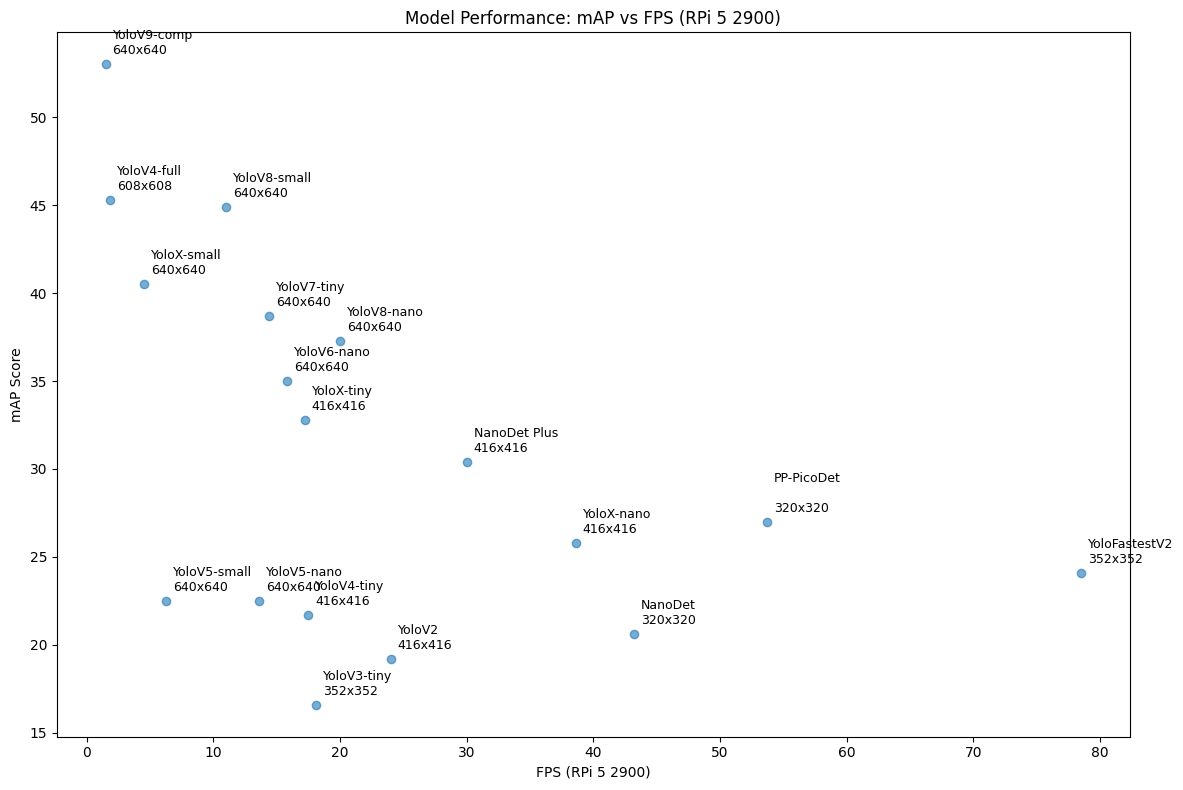

FPS range: 1.5 to 78.5
mAP range: 16.6 to 53.0


In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read the CSV file
df = pd.read_csv('table.csv')

# Print the first few rows and data info to check the structure
print(df.head())
print(df.info())

# Extract size from the 'Image Size' column
df['size_numeric'] = df['Image Size'].str.extract('(\d+)').astype(float)

# Convert 'mAP' and 'RPi 5 2900' to numeric, replacing any non-numeric values with NaN
df['mAP'] = pd.to_numeric(df['mAP'], errors='coerce')
df['RPi 5 2900'] = pd.to_numeric(df['RPi 5 2900'], errors='coerce')

# Remove any rows with NaN values
df = df.dropna(subset=['mAP', 'RPi 5 2900', 'size_numeric'])

# Create the 2D dot chart
plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['RPi 5 2900'], df['mAP'], alpha=0.6)

# Customize the chart
plt.title('Model Performance: mAP vs FPS (RPi 5 2900)')
plt.xlabel('FPS (RPi 5 2900)')
plt.ylabel('mAP Score')

# Add labels for each point
for i, row in df.iterrows():
    model_name = row['Model'].split('/')[-1]
    plt.annotate(f"{model_name}\n{row['Image Size']}", 
                 (row['RPi 5 2900'], row['mAP']), 
                 xytext=(5, 5), textcoords='offset points', fontsize=9,
                 ha='left', va='bottom')

# Show the plot
plt.tight_layout()
plt.show()

# Print min and max values to check the scale
print(f"FPS range: {df['RPi 5 2900'].min()} to {df['RPi 5 2900'].max()}")
print(f"mAP range: {df['mAP'].min()} to {df['mAP'].max()}")